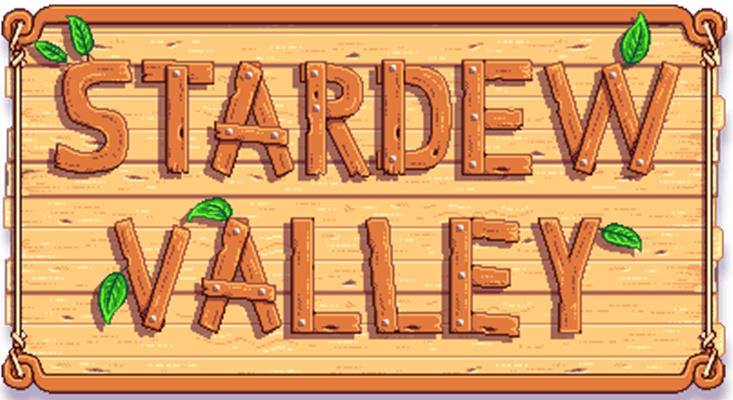

# Stardew Valley Fish Detail EDA Introduction
### Investigating:


* How many unique fish species are there in Stardew Valley?
* What species is the smallest?
* What species is the largest?
* How many fish have no uses in Stardew Valley?
* Which fish can be exclusively caught in Summer?
* Which fish can be exclusively caught in Winter?
* What is the most common behaviour of fish in Stardew Valley?
* What is the correlation between difficulty and behaviour?


# Workspace setup
After importing the fish_detail dataset, I imported a copy of the same dataset and titled it fish_detail_original to preserve an original copy to only clean and make edits on a copy for good practice.

# Data Cleaning
Once I setup my workspace for this project, I clicked on the results grid button to understand the data I was working with. The first thing I noticed was that the 'Time' column contained the characters 'â€“' which should have imported as '-'. I made a note to use the REPLACE function to replace all instances of 'â€“' with '-'.

In [ ]:
UPDATE fish_detail
SET Time = REPLACE(Time, 'â€“', '-')
WHERE Time LIKE '%â€“%';

I then checked for duplicates using the 'Name' column as fish names are unique in Stardew Valley.

In [ ]:
SELECT Name, COUNT(Name)
FROM fish_detail
GROUP BY Name
HAVING COUNT(Name) > 1;

No duplicates were found in this dataset. Next, I noticed the 'Difficulty & Behaviour' contained a value for the fish's difficulty and behaviour, I felt this would be better to seperate and create one column for 'Difficulty' and one column for 'Behaviour'.

In [ ]:
ALTER TABLE fish_detail
ADD COLUMN Difficulty VARCHAR(2),
ADD COLUMN Behaviour VARCHAR(10);

UPDATE fish_detail
SET Difficulty = SUBSTRING(`Difficulty & Behavior`, 1, 2),
    Behaviour = SUBSTRING(`Difficulty & Behavior`, 4, 10);

I then dropped the original 'Difficulty & Behavior' column.

In [ ]:
ALTER TABLE fish_detail
DROP COLUMN `Difficulty & Behavior`;

Because I live in Australia, the spelling has also been changed from 'behavior' to 'behaviour'. I also updated the dataset so the first letter of each word in 'Behaviour' begins in uppercase.

In [ ]:
UPDATE fish_detail
SET Behaviour = CONCAT(UPPER(LEFT(Behaviour, 1)), LOWER(SUBSTRING(Behaviour, 2)));

Next, I wanted to create two new columns, 'Minimum Size' and 'Maximum Size' as it would organise the data for better quality analysis. This was done in the same way 'Difficulty & Behavior' was.

In [ ]:
ALTER TABLE fish_detail
ADD COLUMN `Minimum Size` VARCHAR(2),
ADD COLUMN `Maximum Size` VARCHAR(3);

UPDATE fish_detail
SET `Minimum Size` = SUBSTRING(`Size (inches)`, 1, 2),
    `Maximum Size` = SUBSTRING(`Size (inches)`, 4, 3);

I quickly realised this did not work as intended. Single digit fields in the 'Minimum Size' column included a '-'.

For example, 'Size' '1-37' returned '1-' for 'Minimum Size' and '7' for 'Maximum Size'.

I researched how to fix this problem and came to this solution:

In [ ]:
UPDATE fish_detail
SET `Minimum Size` = TRIM(SUBSTRING(`Size (inches)`, 1, LOCATE('-', `Size (inches)`) - 1)),
    `Maximum Size` = TRIM(SUBSTRING(`Size (inches)`, LOCATE('-', `Size (inches)`) + 1));

The two new columns also needed to be converted to an INT not VARCHAR.

In [ ]:
ALTER TABLE fish_detail
MODIFY COLUMN `Minimum Size` INT,
MODIFY COLUMN `Maximum Size` INT;

This correctly allowed for up to 3 digits on either side of the '-'.

In [ ]:
ALTER TABLE fish_detail
DROP COLUMN `Size (inches)`;

The data is now ready for analysis.

# How many unique fish species are there in Stardew Valley?


I used the COUNT function to return this query.

In [ ]:
SELECT COUNT(Name)
FROM fish_detail;

There are 47 unique fish species in Stardew Valley.

# What species is the smallest?



In [ ]:
SELECT Name, `Minimum Size`
FROM fish_detail
ORDER BY `Minimum Size` ASC;

The Pufferfish, Anchovy, and Sardine are the smallest fish that can be caught in Stardew Valley. These fish can be as small as 1 inch each.

# What species is the largest?

In [ ]:
SELECT Name, `Maximum Size`
FROM fish_detail
ORDER BY `Maximum Size` DESC;

The eel is the largest fish that can be caught in Stardew Valley. This fish can be as large as 81 inches.

# How many fish have no uses in Stardew Valley?


In [ ]:
SELECT `Used In`, COUNT(*)
FROM fish_detail
WHERE `Used In` = 'No Uses';

14 fish have no uses in Stardew Valley.

In [ ]:
SELECT Name, `Used In`
FROM fish_detail
WHERE `Used In` = 'No Uses';

These fish are:

* Anchovy
* Blue Discus
* Dorado
* Blue Halibut
* Herring
* Ice Pip
* Lionfish
* Perch
* Pike
* Red Mullet
* Slimejack
* Smallmouth Bass
* Stingray
* Stonefish



# Which fish can be exclusively caught in Summer?



In [ ]:
SELECT Name, Season
FROM fish_detail
WHERE Season = 'Summer';

The Rainbow Trout, Octopus, and Dorado can all be caught exclusively in Summer.

# Which fish can be exclusively caught in Winter?

In [ ]:
SELECT Name, Season
FROM fish_detail
WHERE Season = 'Winter';

The Perch, Squid, and Lingcod can all be caught exclusively in Winter.

# What is the most common behaviour of fish in Stardew Valley?


In [ ]:
SELECT Behaviour, COUNT(Behaviour)
FROM fish_detail
GROUP BY Behaviour
ORDER BY COUNT(Behaviour) DESC;

The most common behaviour is Mixed (19 species). Followed by:

* Dart (11 species)
* Smooth (8 species)
* Sinker (8 species)
* Floater (1 species)



# What is the correlation between difficulty and behaviour?

In [ ]:
SELECT Behaviour, ROUND(AVG(Difficulty),2) AS `Average Difficulty`
FROM fish_detail
GROUP BY Behaviour
ORDER BY `Average Difficulty` DESC;

If the species of fish has 'Floater' behaviour, it has a higher difficulty on average. As the difficulty decreases, the fish species behaviour shifts from Sinker, to Mixed, to Smooth, then to Dart where the difficulty is 51.36 on average.

# Thanks for looking!